In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import seaborn as sns

# 0. Data Collection

(10000, 17)

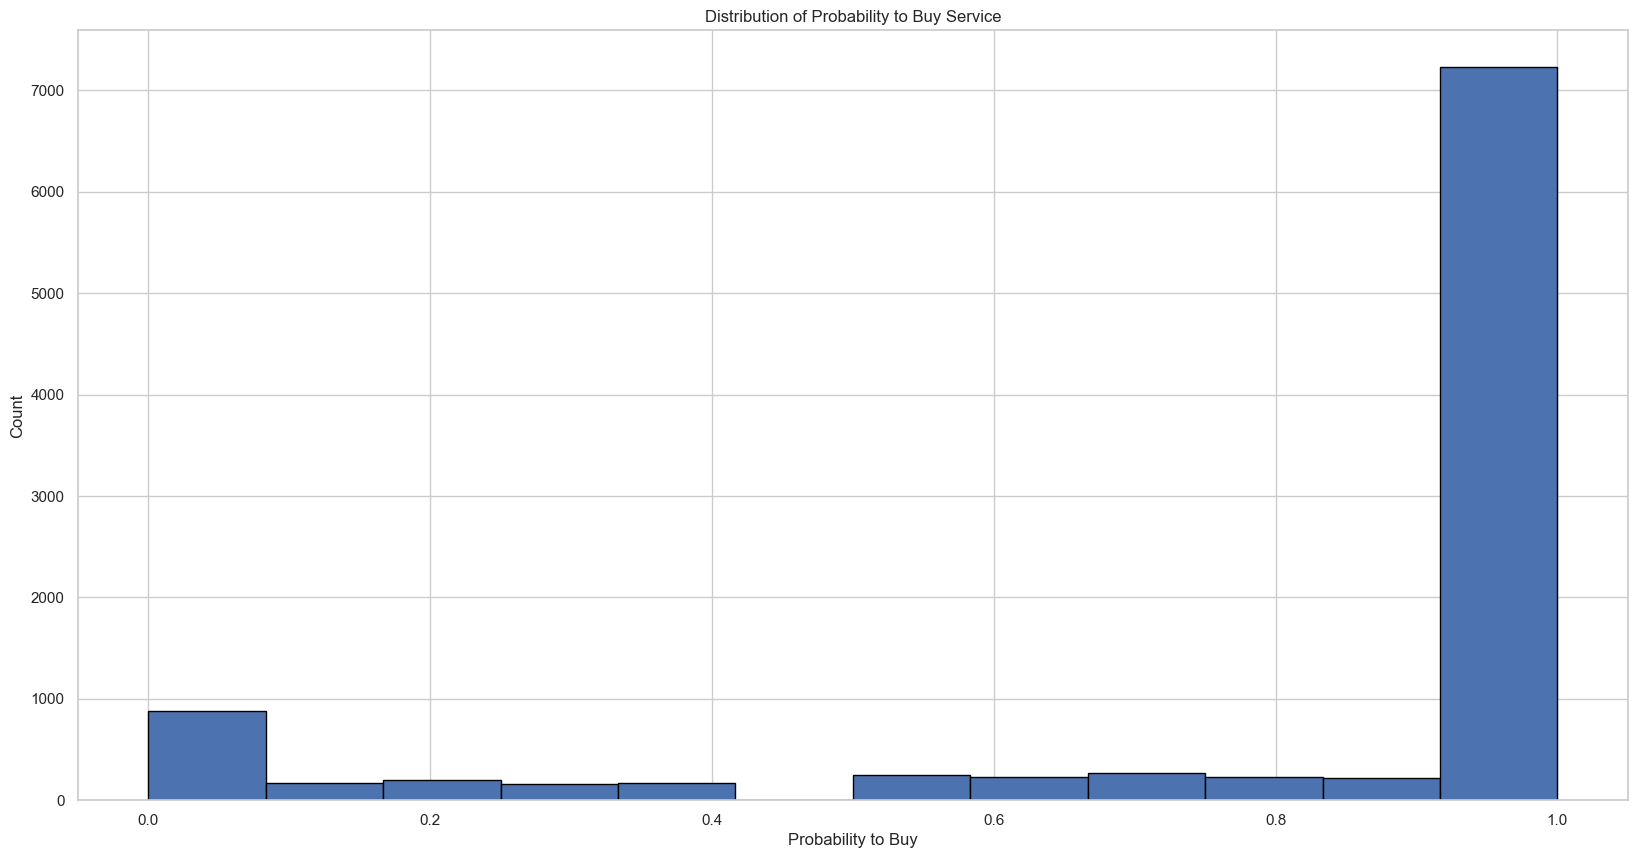

In [249]:
df1 = pd.read_csv('C:\Projects\lipo-predict-ai\data_file\client_data_with_score.csv')
# 3. Plot the Count of probability to buy the service
import matplotlib.pyplot as plt
df1['probability_to_buy'].unique()
plt.hist(df1['probability_to_buy'], bins=12, edgecolor='black')
plt.xlabel('Probability to Buy')    
plt.ylabel('Count')
plt.title('Distribution of Probability to Buy Service')
df1.shape

# 1. Data Cleaning

## 1.1: Remove not required columns

In [250]:
# 1. Remove the not required columns
df2 = df1.drop(['disease', 'profession', 'visceral_fat_percent', 'work_stress_level'], axis=1)

## 1.2: Remove or replace null values

In [251]:
# 2. Remove the null values
# -- Strategy to handle null values
# Numerical → replace with mean/median  
# Categorical → replace with mode or a new category "Unknown" or "other"
df2.isnull().sum()
df3 = df2.dropna()
df3.isnull().sum()
df3.head(5)

,age,weight,height,bmi,gender,is_medical_condition,marital_status,job_type,body_fat_percentage,location,target_weight_loss,physical_activeness,probability_to_buy
0,71,65.4,5.8,20.69,female,yes,married,salried,36.6,Nashik,49,Moderate,1.0
1,34,116.6,6.6,28.96,male,no,married,un-employed,38.6,Mumbai,8,Moderate,0.7
2,80,67.4,4.8,31.06,female,no,married,salried,36.2,Bhiwandi,10,High,1.0
3,40,84.1,4.3,48.21,male,yes,married,salried,35.9,Thane,31,Moderate,1.0
4,43,93.9,4.8,43.27,female,no,single,self_employed,37.9,Nashik,23,High,1.0


## 1.3: Convert the height from feet and inches to cm

In [252]:
# 3. Convert the height from feet and inches to cm
def convert_height_to_cm(height):
    feet, inches = str(height).split(".")
    feet = int(feet)
    inches = int(inches)

    # Convert feet to inches and then to cm
    total_cm = (feet * 30.48) + (inches * 2.54)
    return round(total_cm, 2)
df4 = df3.copy()
df4['height'] = df4['height'].apply(convert_height_to_cm)
max_height = df4['height'].max()
min_height = df4['height'].min()
print(f"Max Height: {max_height} cm, Min Height: {min_height} cm")
df4.head(5)

Max Height: 233.68 cm, Min Height: 121.92 cm


,age,weight,height,bmi,gender,is_medical_condition,marital_status,job_type,body_fat_percentage,location,target_weight_loss,physical_activeness,probability_to_buy
0,71,65.4,172.72,20.69,female,yes,married,salried,36.6,Nashik,49,Moderate,1.0
1,34,116.6,198.12,28.96,male,no,married,un-employed,38.6,Mumbai,8,Moderate,0.7
2,80,67.4,142.24,31.06,female,no,married,salried,36.2,Bhiwandi,10,High,1.0
3,40,84.1,129.54,48.21,male,yes,married,salried,35.9,Thane,31,Moderate,1.0
4,43,93.9,142.24,43.27,female,no,single,self_employed,37.9,Nashik,23,High,1.0


# 2. Feature Engineering

In [253]:
# 1. Convert the categorical feature like "is_medical_condition" (values: "yes" / "no") into 0 and 1
df5 = df4.copy()
df5['is_medical_condition']= df4['is_medical_condition'].str.lower().map({'yes': 1, 'no': 0})

In [254]:
# 2. Convert the categorical feature "gender" into 0, 1, and 2
df6 = df5.copy()
df6['gender'] = df6['gender'].str.lower().map({'male': 1, 'female': 0, 'other': 2})
df6.head(5)

,age,weight,height,bmi,gender,is_medical_condition,marital_status,job_type,body_fat_percentage,location,target_weight_loss,physical_activeness,probability_to_buy
0,71,65.4,172.72,20.69,0,1,married,salried,36.6,Nashik,49,Moderate,1.0
1,34,116.6,198.12,28.96,1,0,married,un-employed,38.6,Mumbai,8,Moderate,0.7
2,80,67.4,142.24,31.06,0,0,married,salried,36.2,Bhiwandi,10,High,1.0
3,40,84.1,129.54,48.21,1,1,married,salried,35.9,Thane,31,Moderate,1.0
4,43,93.9,142.24,43.27,0,0,single,self_employed,37.9,Nashik,23,High,1.0


In [255]:
# 3. Convert the categorical feature "marital_status" into 0, and 1
df7 = df6.copy()
df7['marital_status'] = df7['marital_status'].str.lower().map({'married': 1, 'single': 0})
df7.head(5)

,age,weight,height,bmi,gender,is_medical_condition,marital_status,job_type,body_fat_percentage,location,target_weight_loss,physical_activeness,probability_to_buy
0,71,65.4,172.72,20.69,0,1,1,salried,36.6,Nashik,49,Moderate,1.0
1,34,116.6,198.12,28.96,1,0,1,un-employed,38.6,Mumbai,8,Moderate,0.7
2,80,67.4,142.24,31.06,0,0,1,salried,36.2,Bhiwandi,10,High,1.0
3,40,84.1,129.54,48.21,1,1,1,salried,35.9,Thane,31,Moderate,1.0
4,43,93.9,142.24,43.27,0,0,0,self_employed,37.9,Nashik,23,High,1.0


In [256]:
# 4. Convert the categorical feature "job_type" into vectore using one-hot encoding technique
unique_job_types = df7['job_type'].unique()
print(f"Unique job types: {unique_job_types}")
print(f"Shape of the df before applying one-hot encoding: {df7.shape}")
df8 = df7.copy()
df8 = pd.get_dummies(df8, columns=['job_type'], drop_first=True)
print(f"Shape of the df before applying one-hot encoding: {df8.shape}")
df8.head(5)

Unique job types: ['salried' 'un-employed' 'self_employed' 'business']
Shape of the df before applying one-hot encoding: (10000, 13)
Shape of the df before applying one-hot encoding: (10000, 15)


,age,weight,height,bmi,gender,is_medical_condition,marital_status,body_fat_percentage,location,target_weight_loss,physical_activeness,probability_to_buy,job_type_salried,job_type_self_employed,job_type_un-employed
0,71,65.4,172.72,20.69,0,1,1,36.6,Nashik,49,Moderate,1.0,True,False,False
1,34,116.6,198.12,28.96,1,0,1,38.6,Mumbai,8,Moderate,0.7,False,False,True
2,80,67.4,142.24,31.06,0,0,1,36.2,Bhiwandi,10,High,1.0,True,False,False
3,40,84.1,129.54,48.21,1,1,1,35.9,Thane,31,Moderate,1.0,True,False,False
4,43,93.9,142.24,43.27,0,0,0,37.9,Nashik,23,High,1.0,False,True,False


In [257]:
# 5. Convert the categorical feature "physical_activeness" into 0,1,2 becuase (Low < Moderate < High → )there is a clear ranking.
df9 = df8.copy()
df9['physical_activeness'] = df9['physical_activeness'].str.lower().map({
    'low': 0,
    'moderate': 1,
    'high': 2
})
df9.head(5)

,age,weight,height,bmi,gender,is_medical_condition,marital_status,body_fat_percentage,location,target_weight_loss,physical_activeness,probability_to_buy,job_type_salried,job_type_self_employed,job_type_un-employed
0,71,65.4,172.72,20.69,0,1,1,36.6,Nashik,49,1,1.0,True,False,False
1,34,116.6,198.12,28.96,1,0,1,38.6,Mumbai,8,1,0.7,False,False,True
2,80,67.4,142.24,31.06,0,0,1,36.2,Bhiwandi,10,2,1.0,True,False,False
3,40,84.1,129.54,48.21,1,1,1,35.9,Thane,31,1,1.0,True,False,False
4,43,93.9,142.24,43.27,0,0,0,37.9,Nashik,23,2,1.0,False,True,False


In [258]:
# 6. Find the location and the check the data points for each location
location_stats = df9.groupby('location')['location'].aggregate('count').sort_values(ascending=False)
print(f"Data points for each location: " , location_stats)

Data points for each location:  location
Pune           1144
Aurangabad     1139
Nagpur         1126
Kalyan         1122
Nashik         1120
Thane          1115
Mumbai         1107
Navi Mumbai    1079
Bhiwandi       1048
Name: location, dtype: int64


# 4. Remove Outliers

In [259]:
min_age, max_age = df9['age'].min(), df9['age'].max()
print(f"Min Age: {min_age}, Max Age: {max_age}")
# 1. Remove the client data which age is less than 20 years and more than 70 years
df10 = df9[(df9['age'] >= 20) & (df9['age'] <= 70)]
print(f"Shape of the df after removing age outliers: {df10.shape}")
df10.shape

Min Age: 20, Max Age: 89
Shape of the df after removing age outliers: (7253, 15)


(7253, 15)

In [260]:
#2. Remove the client data which weight is less than 50 kg and more than 120 kg
df11 = df10[(df10['weight'] >= 50) & (df10['weight'] <= 120)]
print(f"Shape of the df after removing weight outliers: {df11.shape}")
min_weight, max_weight = df11['weight'].min(), df11['weight'].max(), 
print(f"Min Weight: {min_weight}, Max Weight: {max_weight}")
min_body_fat, max_body_fat = df11['body_fat_percentage'].min(), df11['body_fat_percentage'].max()
print(f"Min Body Fat Percentage: {min_body_fat}, Max Body Fat Percentage: {max_body_fat}")
print(f"Min Target Weight Loss: {df11['target_weight_loss'].min()}, Max Target Weight Loss: {df11['target_weight_loss'].max()}")
#df11.target_weight_loss.describe()
df11.shape

Shape of the df after removing weight outliers: (5623, 15)
Min Weight: 50.0, Max Weight: 120.0
Min Body Fat Percentage: 35.0, Max Body Fat Percentage: 40.0
Min Target Weight Loss: 2, Max Target Weight Loss: 49


(5623, 15)

In [261]:
# 3. Remove the data which does not satisfy the below condition
df12 = df11[
    ((df11["weight"] >= 50) & (df11["weight"] <= 70) & (df11["body_fat_percentage"].between(20, 30))) |
    ((df11["weight"] > 70) & (df11["weight"] <= 90) & (df11["body_fat_percentage"].between(30, 35))) |
    ((df11["weight"] > 90) & (df11["weight"] <= 120) & (df11["body_fat_percentage"].between(35, 40)))
]
print("Original dataset shape:", df12.shape)
df12.head(5)

Original dataset shape: (2464, 15)


,age,weight,height,bmi,gender,is_medical_condition,marital_status,body_fat_percentage,location,target_weight_loss,physical_activeness,probability_to_buy,job_type_salried,job_type_self_employed,job_type_un-employed
1,34,116.6,198.12,28.96,1,0,1,38.6,Mumbai,8,1,0.7,False,False,True
4,43,93.9,142.24,43.27,0,0,0,37.9,Nashik,23,2,1.0,False,True,False
5,22,115.6,233.68,20.72,0,0,0,38.8,Navi Mumbai,6,1,0.9,False,False,False
10,57,99.9,172.72,32.52,1,0,1,37.3,Pune,21,0,1.0,True,False,False
18,68,116.5,127.00,69.43,0,0,1,38.9,Mumbai,15,1,1.0,False,False,False


In [262]:
# 3. Remove the data if the target weight more than actual fat wieght
actual_fat_loss_weight = df12["weight"] * (df12["body_fat_percentage"] / 100)
df13 = df12[df12['target_weight_loss'] <= actual_fat_loss_weight]
df13.shape
#df13.head(5)

(1959, 15)

(1959, 15)

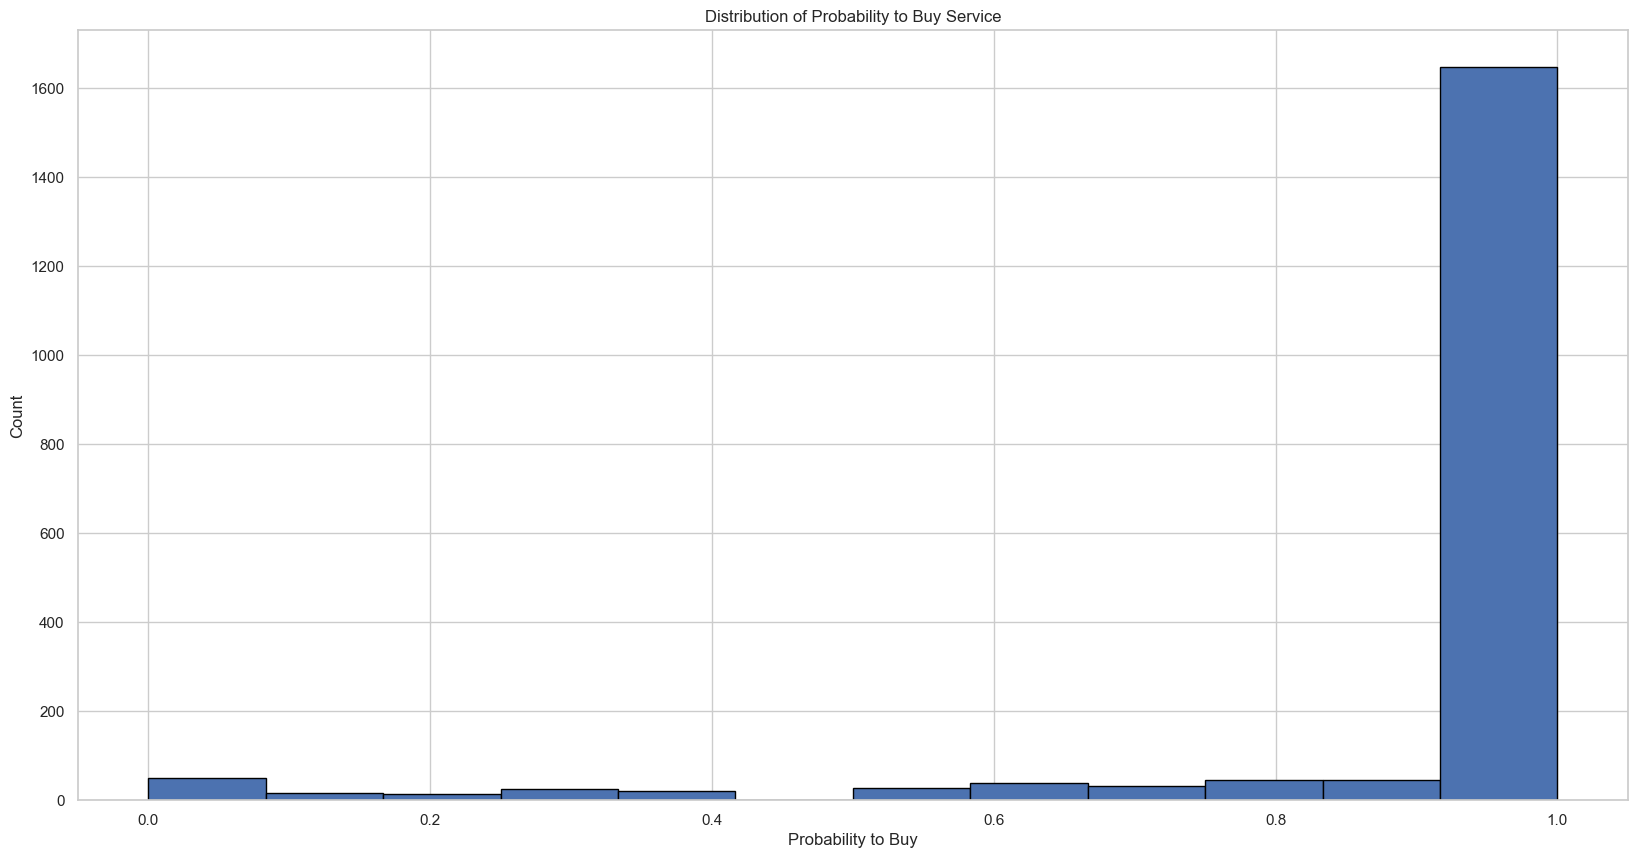

In [263]:
import matplotlib.pyplot as plt
df13['probability_to_buy'].unique()
plt.hist(df13['probability_to_buy'], bins=12, edgecolor='black')
plt.xlabel('Probability to Buy')    
plt.ylabel('Count')
plt.title('Distribution of Probability to Buy Service')
df13.shape

# 5. Encoding

In [264]:
# 1. Convert the location into numerical values
df14 = pd.get_dummies(df13, columns=['location'], drop_first=True)
print(f"Shape of the df after applying one-hot encoding: {df14.shape}")
df14.head(2)

Shape of the df after applying one-hot encoding: (1959, 22)


,age,weight,height,bmi,gender,is_medical_condition,marital_status,body_fat_percentage,target_weight_loss,physical_activeness,...,job_type_self_employed,job_type_un-employed,location_Bhiwandi,location_Kalyan,location_Mumbai,location_Nagpur,location_Nashik,location_Navi Mumbai,location_Pune,location_Thane
1,34,116.6,198.12,28.96,1,0,1,38.6,8,1,...,False,True,False,False,True,False,False,False,False,False
4,43,93.9,142.24,43.27,0,0,0,37.9,23,2,...,True,False,False,False,False,False,True,False,False,False


# 6. Data Division

In [265]:
# 1. Divinde the data into dependent and independent features
X = df14.drop(['probability_to_buy'], axis=1)
y = df14['probability_to_buy']

In [266]:
# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
# 3. Train the model using Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Linear Regression model accuracy: {model.score(X_test, y_test)}")

Linear Regression model accuracy: 0.38009962584616863


In [269]:
# 4. Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_scores = cross_val_score(model, X, y, cv=cv)
cross_val_scores

array([0.31450747, 0.3621901 , 0.30369392, 0.34298464, 0.279017  ])

In [273]:
# Add constant for intercept
%pip install statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.6 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.6 MB 10.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 11.2 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.6 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   --------------

In [275]:
# Convert boolean columns to int for statsmodels compatibility
X_train_sm_fixed = X_train_sm.copy()
for col in X_train_sm_fixed.select_dtypes(include=['bool']).columns:
	X_train_sm_fixed[col] = X_train_sm_fixed[col].astype(int)

glm_binom = sm.GLM(y_train, X_train_sm_fixed, family=sm.families.Binomial())
glm_result = glm_binom.fit()

print(glm_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     probability_to_buy   No. Observations:                 1567
Model:                            GLM   Df Residuals:                     1545
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -157.71
Date:                Tue, 19 Aug 2025   Deviance:                       176.38
Time:                        19:07:07   Pearson chi2:                     281.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2437
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

In [277]:
# Convert boolean columns to int for statsmodels compatibility
X_test_sm_fixed = X_test_sm.copy()
for col in X_test_sm_fixed.select_dtypes(include=['bool']).columns:
	X_test_sm_fixed[col] = X_test_sm_fixed[col].astype(int)

y_pred = glm_result.predict(X_test_sm_fixed)

In [278]:
print(y_pred[:10])

5858    0.988739
2842    0.998277
2243    0.998314
1956    0.935820
9826    0.793979
4838    0.916928
747     0.160571
7590    0.999922
6104    0.999840
1290    0.999140
dtype: float64


In [280]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Actual values
y_true = y_test

# Predicted values
# Predicted values
y_pred = glm_result.predict(X_test_sm_fixed)

# MAE
mae = mean_absolute_error(y_true, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# R2 Score
r2 = r2_score(y_true, y_pred)

print("📊 Model Evaluation Metrics")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# Log-Likelihood (already part of GLM result)
print("\nLog-Likelihood (from GLM):", glm_result.llf)


📊 Model Evaluation Metrics
MAE  : 0.0595
RMSE : 0.1355
R²   : 0.6936

Log-Likelihood (from GLM): -157.70664275137133
